In [4]:
%matplotlib inline

import machinevisiontoolbox as mvt
from machinevisiontoolbox.Image import Image
import numpy as np


# examples for imageprocessing.py
ip = mvt.ImageProcessing()

# list of image filenames
nimg = 8
flowers = [str(('../images/flowers' + str(i+1) + '.png')) for i in range(nimg)]
for i in range(len(flowers)):
    print(flowers[i])

# list of images
imlist = [mvt.iread(('../images/' + i)) for i in flowers]


../images/flowers1.png
../images/flowers2.png
../images/flowers3.png
../images/flowers4.png
../images/flowers5.png
../images/flowers6.png
../images/flowers7.png
../images/flowers8.png


In [5]:
# test iint:

imgs = mvt.Image(imlist)
im_uint16 = ip.iint(imgs, intclass='uint16')

print(imgs.dtype)
print(im_uint16.dtype)


uint8
uint16


In [6]:
# test idouble

imgs = mvt.Image(imlist)
ip = mvt.ImageProcessing()
imdouble = ip.idouble(imgs)
print(imgs.dtype)
print(imdouble.dtype)


uint8
float32


(426, 640, 3)
255
0


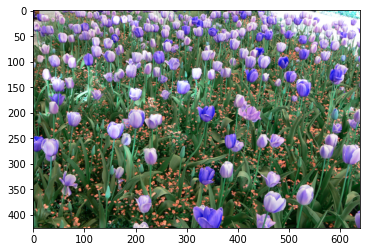

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


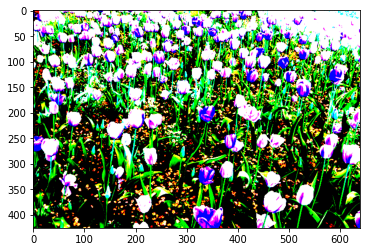

10.0
0.0


In [7]:
# test image stretch
imgs = mvt.Image(imlist)

print(imgs.shape)
print(imgs.image.max())
print(imgs.image.min())
imgs.disp()

imstretch = ip.stretch(imgs[0], max=10, range=[100, 255])
imstretch.disp()
print(imstretch.image.max())
print(imstretch.image.min())

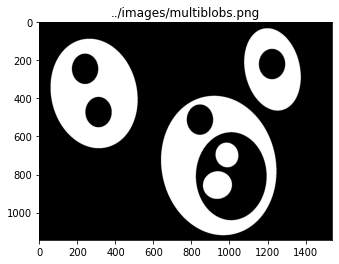

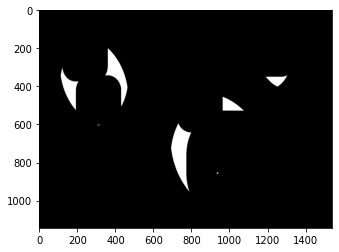

In [8]:
# test image erosion
imbwfile = '../images/multiblobs.png'
imbw = mvt.Image(imbwfile)
imbw.disp()

ime = ip.erode(imbw, np.ones((3, 3)), n = 50)
ime.disp()

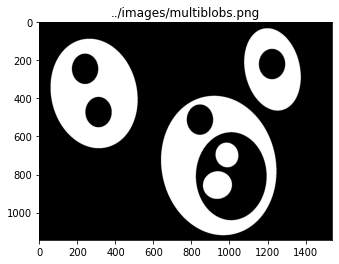

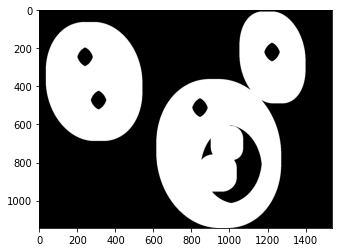

In [9]:

imbwfile = '../images/multiblobs.png'
imbw = mvt.Image(imbwfile)
imbw.disp()

ime = ip.dilate(imbw, np.ones((3, 3)), n = 25)
ime.disp()

iscolor = False


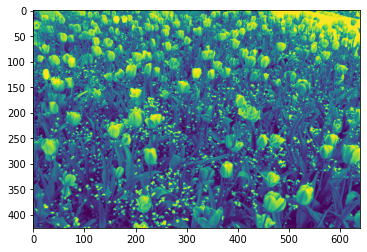

(426, 640)


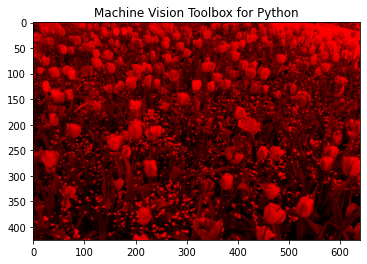

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Machine Vision Toolbox for Python'}>)

In [10]:
# test color function:

# test with a mono image
imgs = mvt.Image(imlist, iscolor=False)
print('iscolor =', imgs.iscolor)
imgs.disp()
print(imgs.shape)

ip = mvt.ImageProcessing()
imc = ip.colorise(imgs, [1, 0, 0])  # make red
mvt.idisp(imc.rgb)

# check min/max:
#print(imc.image.min)
#print(np.min(imc.image))



num images = 8
num channels = 3
num images = 8
num channels = 3


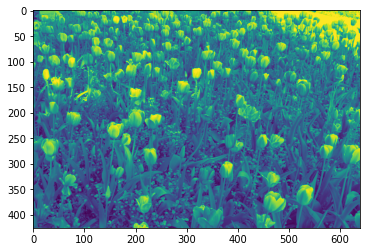

In [11]:
# try converting list of images to mono:

imgs = mvt.Image(imlist, iscolor=True)
print('num images =', imgs.nimages)
print('num channels =', imgs.nchannels)

ip = mvt.ImageProcessing()
mono_imgs = ip.mono(imgs)
print('num images =', imgs.nimages)
print('num channels =', imgs.nchannels)

mono_imgs.disp()

label


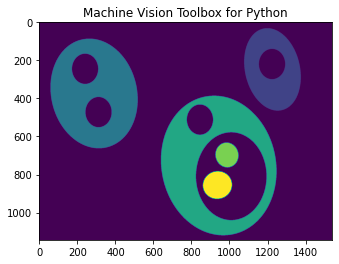

6


In [12]:

# label:

print('label')
im = Image('../images/multiblobs.png')

retval, labels = ip.label(im)

mvt.idisp(labels)
print(retval)
print(labels)
np.max(labels)

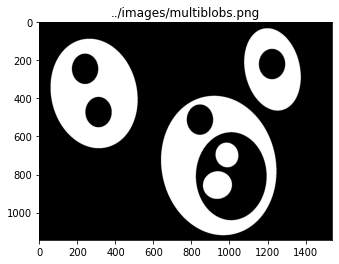

<class 'machinevisiontoolbox.Image.Image'>


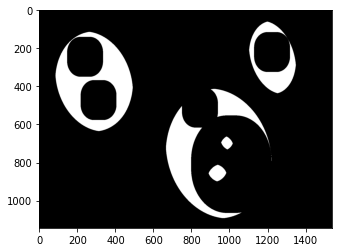

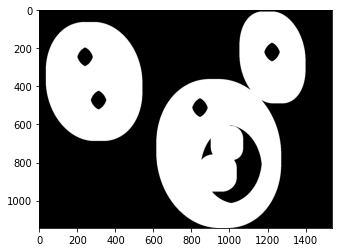

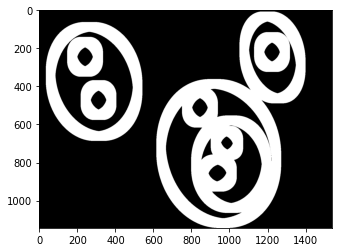

In [13]:
# check morph
imbwfile = '../images/multiblobs.png'
imbw = mvt.Image(imbwfile)
imbw.disp()

se = np.ones((3, 3))
immi = ip.morph(imbw, se, oper='min', n=25)
print(type(immi))
immi.disp()
imma = ip.morph(imbw, se, oper='max', n=25)
imma.disp()
imd = ip.morph(imbw, se, oper='diff', n=25)
imd.disp()


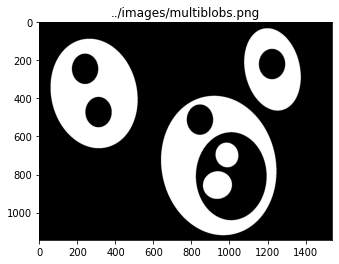

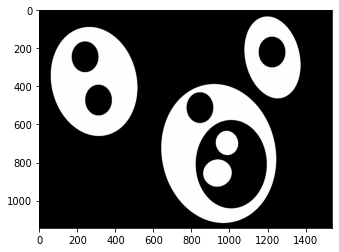

In [14]:
# check hitormiss
imbwfile = '../images/multiblobs.png'
imbw = mvt.Image(imbwfile)
imbw.disp()

se = np.ones((3, 3))
imhm = ip.hitormiss(imbw, se)
imhm.disp()
# this one's probably best left to the unit tests

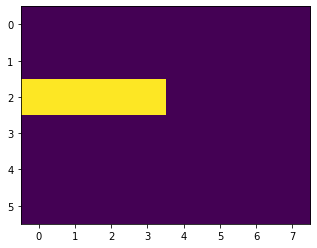

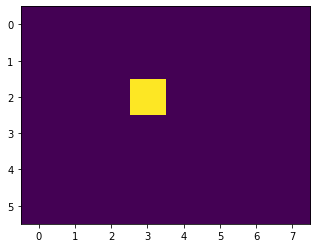

max =  1
min =  0
(6, 8)
(array([2]), array([3]))


In [15]:
# test endpoint

# imbwfile = '../images/sharks.png'
# imbw = mvt.Image(imbwfile)
# imbw.disp()
imbw = np.array([[0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [1, 1, 1, 1, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0]])
imbw = mvt.Image(imbw)
imbw.disp()

imep = ip.endpoint(imbw)
imep.disp() # too bloody small
print('max = ', imep.image.max())  # we know they're there!
print('min = ', imep.image.min())
print(imep.shape)
print(np.where(imep.image > 0))

# imd = ip.dilate(imep, np.ones((1,1)), n=10)
# imd.disp()